# 7.1.12

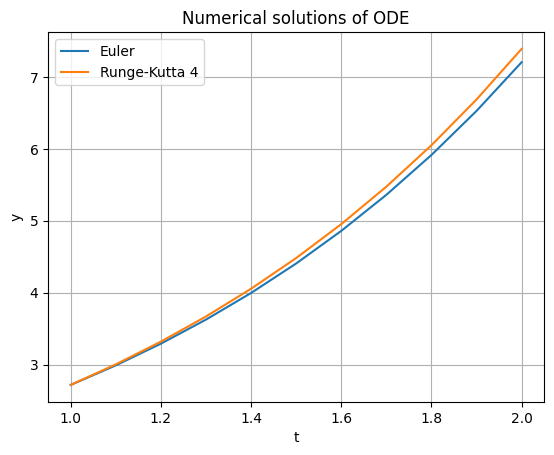

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Определим функцию f(t, y) как в задаче
def f(t, y):
    return -y / t + (t + 1) * np.exp(t) / t

# Метод Эйлера
def euler(f, t0, y0, h, T):
    N = int((T - t0) / h)
    t = np.linspace(t0, T, N + 1)
    y = np.zeros(N + 1)
    y[0] = y0
    for i in range(N):
        y[i + 1] = y[i] + h * f(t[i], y[i])
    return t, y

# Метод Рунге-Кутты 4-го порядка
def rk4(f, t0, y0, h, T):
    N = int((T - t0) / h)
    t = np.linspace(t0, T, N + 1)
    y = np.zeros(N + 1)
    y[0] = y0
    for i in range(N):
        k1 = h * f(t[i], y[i])
        k2 = h * f(t[i] + h / 2, y[i] + k1 / 2)
        k3 = h * f(t[i] + h / 2, y[i] + k2 / 2)
        k4 = h * f(t[i] + h, y[i] + k3)
        y[i + 1] = y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return t, y

# Начальные условия
t0 = 1
T = 2
y0 = np.exp(1)
h = 0.1

# Решения с использованием методов Эйлера и Рунге-Кутты
t_euler, y_euler = euler(f, t0, y0, h, T)
t_rk4, y_rk4 = rk4(f, t0, y0, h, T)

# Построение графиков
plt.plot(t_euler, y_euler, label='Euler')
plt.plot(t_rk4, y_rk4, label='Runge-Kutta 4')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Numerical solutions of ODE')
plt.grid(True)
plt.show()


# 7.2.5

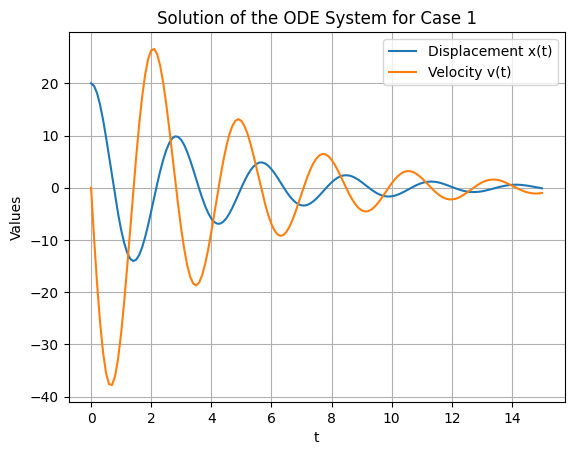

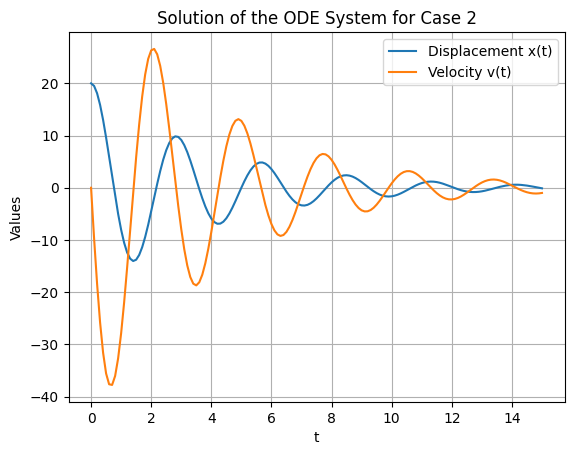

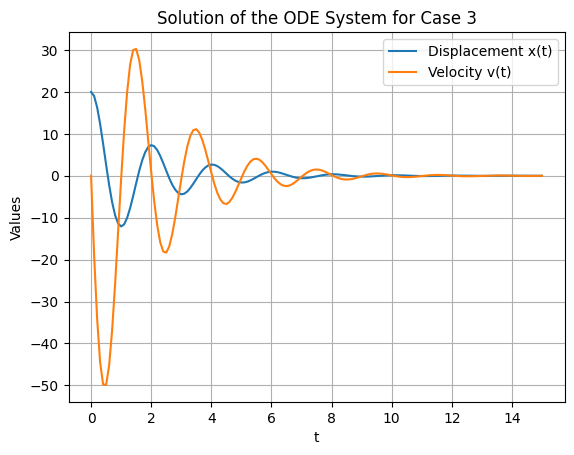

In [20]:

# Определим параметры для каждого случая
params = [
    (0.5, 5, 1, lambda t: 0, 20, 0, 15),  # Case I
    (0.5, 5, 1, lambda t: 0, 20, 0, 15),  # Case II
    (0.5, 5, 0.5, lambda t: 0, 20, 0, 15)  # Case III
]

# Система ОДУ
def system(t, Y, H, k, m, f):
    x1, x2 = Y
    dx1dt = x2
    dx2dt = (f(t) - H * x2 - k * x1) / m
    return np.array([dx1dt, dx2dt])

# Метод Рунге-Кутты 4-го порядка
def rk4(system, t0, Y0, h, T, H, k, m, f):
    N = int((T - t0) / h)
    t = np.linspace(t0, T, N + 1)
    Y = np.zeros((N + 1, len(Y0)))
    Y[0] = Y0
    for i in range(N):
        k1 = h * system(t[i], Y[i], H, k, m, f)
        k2 = h * system(t[i] + h / 2, Y[i] + k1 / 2, H, k, m, f)
        k3 = h * system(t[i] + h / 2, Y[i] + k2 / 2, H, k, m, f)
        k4 = h * system(t[i] + h, Y[i] + k3, H, k, m, f)
        Y[i + 1] = Y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return t, Y

# Начальные условия
t0 = 0
h = 0.1

# Решение задачи для каждого набора параметров
for i, (H, k, m, f, x0, v0, T) in enumerate(params):
    Y0 = np.array([x0, v0])
    t, Y = rk4(system, t0, Y0, h, T, H, k, m, f)
    x1, x2 = Y[:, 0], Y[:, 1]

    # Построение графиков для каждого набора параметров
    plt.figure()
    plt.plot(t, x1, label='Displacement x(t)')
    plt.plot(t, x2, label='Velocity v(t)')
    plt.legend()
    plt.xlabel('t')
    plt.ylabel('Values')
    plt.title(f'Solution of the ODE System for Case {i + 1}')
    plt.grid(True)
    plt.show()


# 7.7.4

              t         y
0      0.000000  1.100000
1      0.000098  1.099946
2      0.000195  1.099893
3      0.000293  1.099839
4      0.000391  1.099785
...         ...       ...
14268  5.970020  1.554198
14269  5.976270  1.554251
14270  5.982520  1.554304
14271  5.988770  1.554356
14272  6.000000  1.554450

[14273 rows x 2 columns]


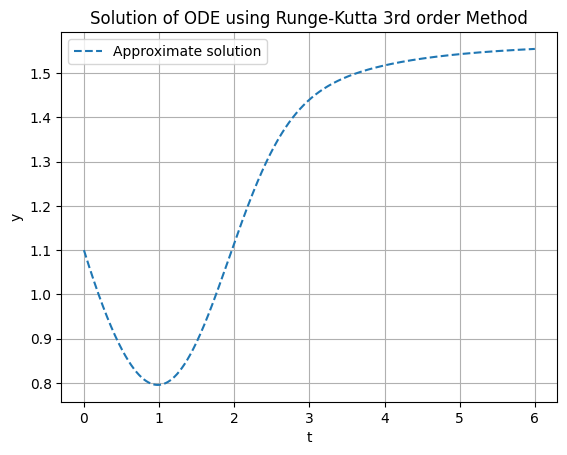

In [25]:
import pandas as pd

# Заданная функция
def f(t, y):
    return 0.5 * t**2 * np.cos(y) - 0.5 * y * np.exp(-t / 6)

# Метод Рунге-Кутты 3-го порядка II (4-й порядок для явных методов)
def runge_kutta_3(f, t0, T, y0, h, epsilon):
    t = t0
    y = y0
    result = [(t, y)]
    
    while t < T:
        if t + h > T:
            h = T - t

        k1 = h * f(t, y)
        k2 = h * f(t + h / 2, y + k1 / 2)
        k3 = h * f(t + h, y - k1 + 2 * k2)

        y_next = y + (k1 + 4 * k2 + k3) / 6

        # Контроль ошибки и адаптации шага
        if np.abs(y_next - y) > epsilon:
            h /= 2
        else:
            t += h
            y = y_next
            result.append((t, y))
            if np.abs(y_next - y) < epsilon / 10:
                h *= 2
                
    return result

# Начальные условия
t0 = 0
T = 6
y0 = 1.1
h_initial = 0.1
epsilon = 1e-4

# Решение
solution = runge_kutta_3(f, t0, T, y0, h_initial, epsilon)

# Сохранение решений в файл
with open("solution.txt", "w") as file:
    for (t, y) in solution:
        file.write(f"{t}\t{y}\n")

# Функция для чтения из файла и записи в DataFrame
def read_solution_file(filepath):
    return pd.read_csv(filepath, delimiter='\t', header=None, names=['t', 'y'])

# Пример использования функции
data = read_solution_file("solution.txt")
print(data)

# Построение графика приблизительного решения
t_sol, y_sol = zip(*solution)

plt.plot(t_sol, y_sol, label="Approximate solution", linestyle='--')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solution of ODE using Runge-Kutta 3rd order Method')
plt.legend()
plt.grid()
plt.show()
